# **Parte 3: Proyecto Final**
Maria Paula Alba Gomez <br>
Diseño de Software Inteligente <br>
Maestria en Inteligencia Artificial<br>



Conjunto de datos seleccionado: [Students Performance in Exams](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?select=StudentsPerformance.csv)

Para este proyecto se pretende realizar un modelo de clasificación que predice si se pasa un exámen o no de acuerdo a ciertas características como son el género, el tipo de comida que se le da al estudiante, el nivel de preparación para el exámen, el nivel de educación de los padres y a partir del promedio de las notas obtenidas en matemáticas, lectura y escritura.

# Importación de Librerias

In [1]:
import sys
from packaging import version

import sklearn

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

Se requiere Python 3.7 o superior y  Scikit-Learn ≥ 1.0.1:

In [2]:
assert sys.version_info >= (3, 7)
print(version.parse(sklearn.__version__))

1.2.2


Código extra - código para guardar las figuras como PNG de alta resolución para el libro (Tomado del colab de ejemplo presentado en la clase)

In [3]:
IMAGES_PATH = Path() / "images" / "end_to_end_project"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Cargue de datos

El conjunto de datos [Students Performance in Exams](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?select=StudentsPerformance.csv) se encuentran en el repositorios de [GitHub](https://github.com/mariap-alba/DSI).



In [4]:
url = "https://raw.githubusercontent.com/mariap-alba/DSI/master/dataset/StudentsPerformance.csv"
dataset = pd.read_csv(url)

# Visualización de los datos

Se visualiza las primeras 5 lineas del dataset con el método head()

In [5]:
dataset.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


El dataset cuenta con 8 atributos: gender, race/ethnicity, parental level of education, lunch, test preparation course, math score, reading score y writing score.

Se realiza una copia del dataset con el método copy() para no modificar el dataset original.

In [6]:
students = dataset.copy()

Se obtiene el promedio de las caracterícticas 'math score', 'reading score' y 'writing score' por cada instancia.

In [7]:
mean_score= []
for i in range(students.shape[0]):
  suma = students['math score'][i] + students['reading score'][i] + students['writing score'][i]
  mean = suma/3
  mean_score.append(round(mean,1))

print(mean_score)

[72.7, 82.3, 92.7, 49.3, 76.3, 77.3, 91.7, 40.7, 65.0, 49.3, 54.7, 45.0, 73.0, 73.3, 53.7, 74.0, 87.7, 26.0, 44.7, 57.7, 66.0, 70.0, 50.3, 71.7, 75.0, 73.0, 59.3, 70.3, 68.3, 69.0, 72.3, 63.0, 64.3, 40.0, 88.7, 80.3, 79.3, 57.7, 84.3, 56.7, 56.7, 66.3, 58.7, 63.3, 53.3, 58.7, 60.7, 71.0, 69.0, 82.7, 52.0, 71.3, 46.3, 80.3, 80.7, 39.0, 84.3, 52.0, 58.3, 9.0, 75.0, 37.3, 59.3, 73.3, 58.7, 64.0, 39.7, 68.7, 58.3, 53.3, 64.7, 60.3, 46.7, 58.0, 46.3, 41.0, 26.0, 79.7, 69.0, 66.0, 48.7, 46.3, 50.3, 66.3, 38.3, 78.3, 82.3, 72.0, 65.0, 80.3, 70.3, 32.3, 73.7, 46.0, 85.7, 80.3, 64.3, 68.3, 62.3, 64.7, 71.0, 72.0, 88.3, 50.3, 91.3, 65.7, 95.7, 64.3, 66.0, 68.7, 88.0, 55.3, 51.3, 54.3, 99.7, 78.3, 80.7, 79.7, 58.3, 63.0, 86.7, 90.7, 91.3, 58.7, 78.7, 89.3, 69.0, 72.0, 79.3, 50.3, 85.0, 43.3, 77.0, 80.0, 76.0, 53.7, 48.7, 60.3, 64.0, 67.0, 73.0, 61.7, 50.3, 49.0, 79.7, 31.3, 82.3, 69.0, 74.7, 97.7, 66.0, 70.7, 65.0, 50.0, 63.3, 82.3, 72.7, 60.0, 78.0, 64.0, 78.0, 82.7, 51.3, 51.3, 88.0, 98.7, 51.7

Se agrega al dataset una nueva característica llamada 'mean_score' el cual contiene el promedio de las notas obtenidas en matemáticas, lectura y escritura de cada uno de los estudiantes.

In [8]:
students['mean_score'] = mean_score
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.7
1,female,group C,some college,standard,completed,69,90,88,82.3
2,female,group B,master's degree,standard,none,90,95,93,92.7
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.3
4,male,group C,some college,standard,none,76,78,75,76.3


Si el estudiante supera la nota de 65 en el promedio de las tres materias se le asigna 1 que quiere decir que aprueba el exámen, en caso contrario se le asigna 0

In [9]:
pass_test= []
for i in range(students.shape[0]):
  if students['mean_score'][i] >= 65:
    pass_test.append(1)
  else:
    pass_test.append(0)

print(pass_test)

[1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 

Se agrega la nueva columna llamada pass_test que contiene 0 (no aprueba) y 1(aprueba) 

In [10]:
students['pass_test'] = pass_test
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean_score,pass_test
0,female,group B,bachelor's degree,standard,none,72,72,74,72.7,1
1,female,group C,some college,standard,completed,69,90,88,82.3,1
2,female,group B,master's degree,standard,none,90,95,93,92.7,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.3,0
4,male,group C,some college,standard,none,76,78,75,76.3,1


Mediante el método info() se puede obtener una descripción rápida de los datos, como es el número total de filas, el tipo de cada característica y el número de valores no nulos.

In [11]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   1000 non-null   int64  
 6   reading score                1000 non-null   int64  
 7   writing score                1000 non-null   int64  
 8   mean_score                   1000 non-null   float64
 9   pass_test                    1000 non-null   int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 78.2+ KB


En el conjunto de datos se encuentra 1000 instancias. Se observa que no se encuentran datos nulos.

Los 5 primeros atributos observamos que son datos categóricos y los 5 últimos atributos son datos númericos.

Con método describe() se puede observar el resumen de los datos númericos.

In [12]:
students.describe()

,math score,reading score,writing score,mean_score,pass_test
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,67.769800,0.601000
std,15.16308,14.600192,15.195657,14.257197,0.489938
min,0.00000,17.000000,10.000000,9.000000,0.000000
25%,57.00000,59.000000,57.750000,58.300000,0.000000
50%,66.00000,70.000000,69.000000,68.300000,1.000000
75%,77.00000,79.000000,79.000000,77.700000,1.000000
max,100.00000,100.000000,100.000000,100.000000,1.000000


Con ayuda de los histogramas se viasualizan las instancias en el eje vertical y lo valores en el eje horizontal. Unicamente se observan los datos númericos.

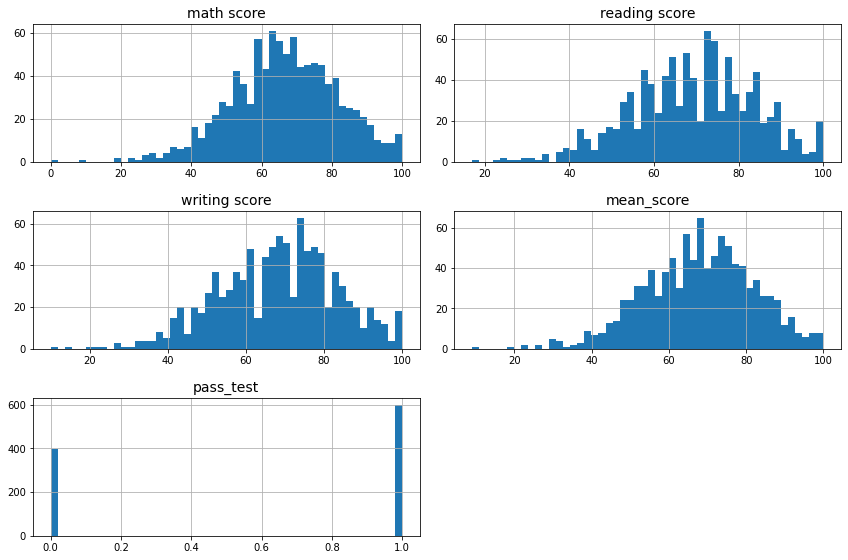

In [13]:
# código extra - las siguientes 5 líneas definen los tamaños de fuente por defecto
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

students.hist(bins=50, figsize=(12, 8))
save_fig("Histogramas")  # extra code
plt.show()

# Matriz de Correlación

La Matriz de Correlación muestra la relación existente entre las características númericas.

In [14]:
corr_matrix = students.corr()

In [15]:
corr_matrix["pass_test"].sort_values(ascending=False)

pass_test        1.000000
mean_score       0.799173
writing score    0.780311
reading score    0.779514
math score       0.721887
Name: pass_test, dtype: float64

El siguiente mapa de calor muestra la matriz de correlación donde se observa que hay una relación directamente proporcional entre las variables y la variable a predecir(pass_test) ya que el valor se acerca a 1.

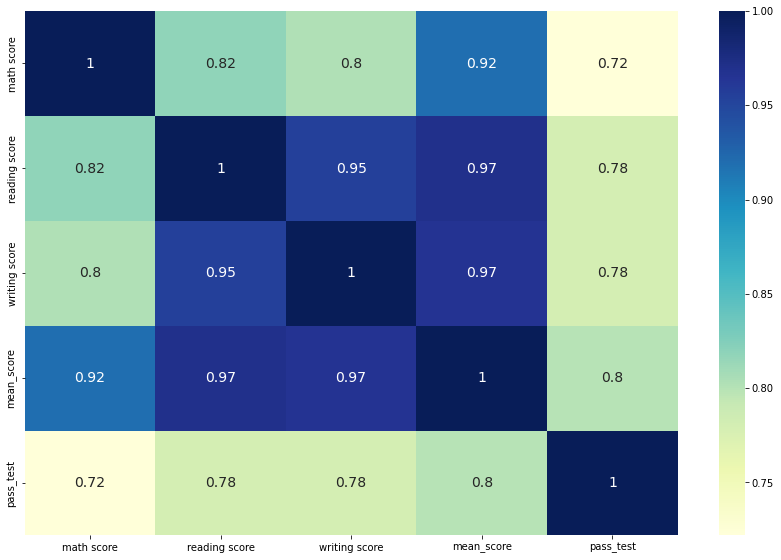

In [16]:
fig, ax = plt.subplots(figsize=(12,8)) 
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', ax=ax)
save_fig("Matriz de Correlacion")  # extra code

Para comprobar la correlación entre los atributos, se utiliza la función scatter_matrix(), que compara entre si cada uno de las datos numéricos.

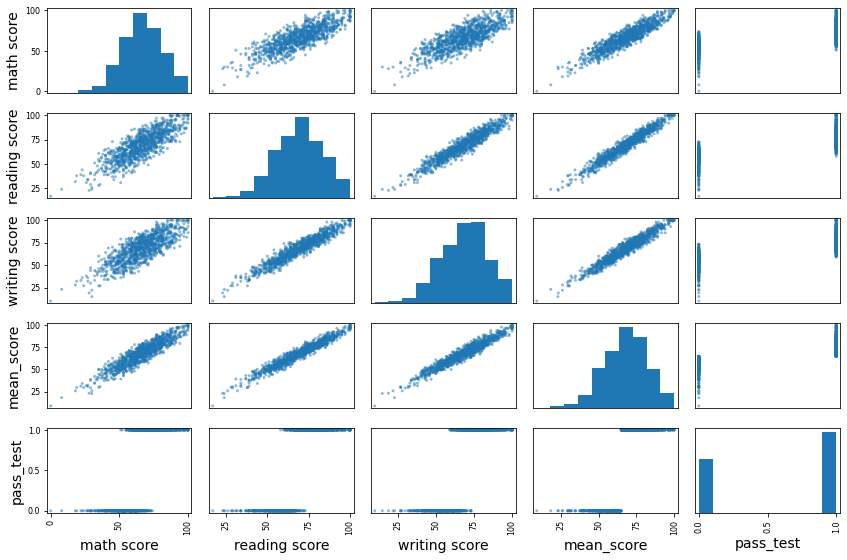

In [17]:
from pandas.plotting import scatter_matrix

scatter_matrix(students, figsize=(12, 8))
save_fig("Scatter Matrix")  # extra code
plt.show()

# División de datos train y test

Se divide la variable a predecir del resto de los datos

In [18]:
X = students.drop('pass_test', axis=1)
y = students['pass_test']

Se verifica que tanto X como y quedan con el mismo número de instancias.

In [19]:
X.shape, y.shape

((1000, 9), (1000,))

Mediante train_test_split se dividen los datos en entrenamiento (80%) y prueba(20%) con los datos estrateficados.

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 , stratify=y)

Como se observa en los dos histogramas los datos quedaron correctamente estratificados en la variable a predecir.

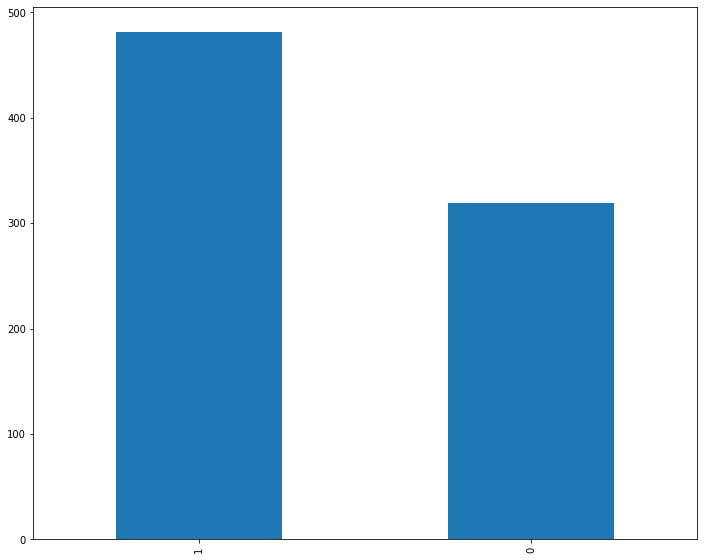

In [21]:
y_train.value_counts().plot(kind='bar', figsize=(10,8))
save_fig("Histograma Y_train")  # extra code
plt.show()

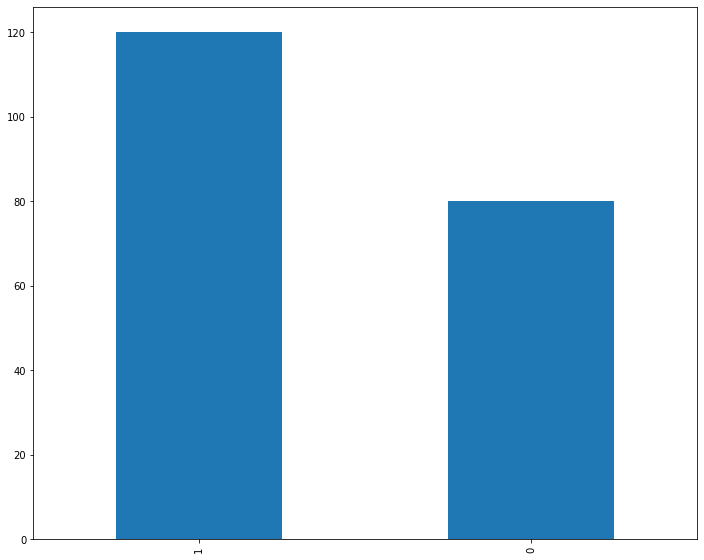

In [22]:
y_test.value_counts().plot(kind='bar', figsize=(10,8))
save_fig("Histograma Y_test")  # extra code
plt.show()

# Preparación de los datos

Se realiza una copia en caso de que se presente un error en el procesamiento de los datos y no altere el dataset original

In [23]:
X_data = X_train.copy()
y_data = y_train.copy()

In [24]:
# Tamaño de X_data y y_data
X_data.shape, y_data.shape

((800, 9), (800,))

## Limpieza de datos

Como se observó con método info() el dataset no cuenta con datos nulos, se verifica la información mediante la función matrix de Missingo el cual permite visualizar donde se encuentran los datos nulos en caso de que exitan. 

Para este caso se comprueba que todos las características cuentan con 1000 instancias en total.

<ipython-input-3-f3badef8a755>:7: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


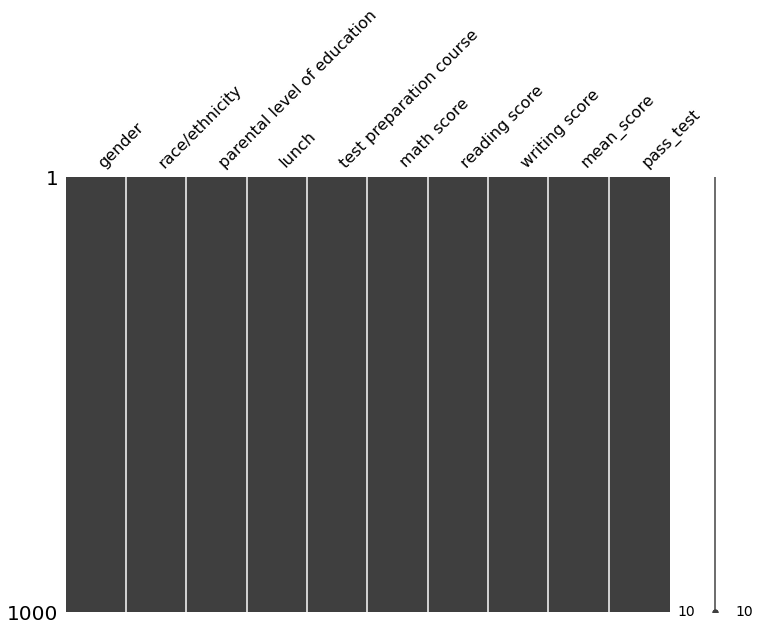

In [25]:
# Importacion de la libreria missingno
import missingno as msno
msno.matrix(students, figsize=(12,8))
save_fig("Visualizacion datos faltantes")  # extra code

## Tratamiento de datos categóricos y Escalado de datos númericos

Para convertir los datos categóricos en datos númericos se utiliza la libreria OneHotEncoder que asigna el valor de 1 a la categoría presente y cero a las demás. 



In [26]:
# Importación de la libre OneHotEncoder 
from sklearn.preprocessing import OneHotEncoder

In [27]:
# Lista de las colomnas con datos categóricos
X_data_categoricos = ['gender', 'race/ethnicity','parental level of education','lunch','test preparation course']
X_data_categoricos

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

Para normalizar los datos númericos se utiliza la herramienta StandardScaler el cual obtiene el valor medio y lo divide por la desviación estandar.

In [28]:
# Importación de la libre StandardScaler
from sklearn.preprocessing import StandardScaler

In [29]:
# Lista de las columnas con datos númericos
X_data_num = ['math score','reading score','writing score'] 
X_data_num

['math score', 'reading score', 'writing score']

### Pipeline

Los Pipeline permiten realizar el proceso de limpieza, normalización y transformación de datos categóricos de una forma más rapida y disminuyendo las lineas de ejecución

In [30]:
# Importación de la libreria Pipeline
from sklearn.pipeline import Pipeline

#### Pipeline datos númericos

Se crea un pipeline para los datos númericos que permite normalizar los datos con StandarScaler

In [31]:
# Creacion pipeline númerico
num_pipeline = Pipeline([("standardize", StandardScaler())])

#### Pipeline datos categóricos

Se crea un pipeline para los datos categóricos que permite la transformación de categóricos a númericos mediante OneHotEncoder.

In [32]:
# Creacion pipeline categórico
cat_pipeline = Pipeline([("categoricos", OneHotEncoder())])

### ColumnTransformer

Con ayuda del ColumnTransformer permite aplicar los pipeline especificando las columnas del dataset. 

In [33]:
# Importación de la libreria ColumnTransformer
from sklearn.compose import ColumnTransformer

In [34]:
# Se instancia la clase ColumnTransformer con los pipeline para datos categóricos y númericos
transformer = ColumnTransformer([('Numerico',num_pipeline,X_data_num),('Categorico', cat_pipeline, X_data_categoricos)])

In [35]:
# Con fit_transform los datos quedan transformados y escalados
X_tf = transformer.fit_transform(X_data)  

In [36]:
X_tf

array([[-1.13569524, -0.77559568, -0.8676967 , ...,  0.        ,
         0.        ,  1.        ],
       [-0.93824026,  0.46246859,  0.12094367, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.70721793,  1.28784478,  1.24140276, ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [-0.41169364, -0.36290759,  0.3845811 , ...,  1.        ,
         1.        ,  0.        ],
       [-0.14842033, -0.91315838, -1.06542477, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.76031117,  1.01271938,  1.43913083, ...,  1.        ,
         1.        ,  0.        ]])

In [37]:
X_tf_test = transformer.transform(X_test)
X_tf_test

array([[ 0.04903465,  0.1873432 ,  0.3845811 , ...,  1.        ,
         0.        ,  1.        ],
       [-1.2673319 , -0.50047029, -0.14269376, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.24648964, -0.43168894, -0.66996862, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.082602  ,  0.25612455, -0.01087504, ...,  0.        ,
         1.        ,  0.        ],
       [-0.28005698, -0.91315838, -0.99951541, ...,  1.        ,
         1.        ,  0.        ],
       [ 0.31230796,  0.53124994,  0.58230918, ...,  1.        ,
         1.        ,  0.        ]])

# Entrenamiento del modelo

El modelo se entrenará con Support Vector Machine (SVM) con kernel polinomial y kernel gaussiano, KNeighbors y Random Forest

In [38]:
# Importación de librerias SVC, KNeighbors, RandomForest
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## SVC kernel polinomial

In [39]:
poly = SVC(kernel='poly', degree = 2)
poly.fit(X_tf, y_data)

SVC(degree=2, kernel='poly')

In [40]:
poly.score(X_tf, y_data)

0.99

In [41]:
poly.score(X_tf_test, y_test)

0.97

## SVC kernel gaussiano

In [42]:
rbf = SVC(kernel='rbf', gamma=0.05)
rbf.fit(X_tf, y_data)

SVC(gamma=0.05)

In [43]:
rbf.score(X_tf, y_data)

0.99125

In [44]:
rbf.score(X_tf_test, y_test)

0.965

## KNN

In [45]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_tf, y_data)

KNeighborsClassifier()

In [46]:
knn.score(X_tf, y_data)

0.96875

In [47]:
knn.score(X_tf_test, y_test)

0.965

## Random Forest

In [48]:
rf = RandomForestClassifier(max_depth=5, random_state=123)
rf.fit(X_tf, y_data)

RandomForestClassifier(max_depth=5, random_state=123)

In [49]:
rf.score(X_tf, y_data)

0.99625

In [50]:
rf.score(X_tf_test, y_test)

0.975

## GridSearchCV

GridSearch permite buscar los hiperparametros que muestren mejores resultados para el modelo.

Para este caso se seleccionó el algoritmo de Random Forest

In [51]:
# Importación de la libreria GridSearchCV
from sklearn.model_selection import GridSearchCV

### Grid Random Forest

In [52]:
n_estimator = [i**2 for i in range(2,33,2)]

In [53]:
max_depth = [i*2 for i in range(1,16)]
max_depth = max_depth + [None]

In [54]:
# Diccionario con la varición de hiperparametros
params_grid_rf = {'n_estimators':n_estimator, 'max_depth': max_depth}

print('Hiperparametro n_estimators: {}'.format(params_grid_rf['n_estimators']))
print('Hiperparametro max_depth: {}'.format(params_grid_rf['max_depth']))

Hiperparametro n_estimators: [4, 16, 36, 64, 100, 144, 196, 256, 324, 400, 484, 576, 676, 784, 900, 1024]
Hiperparametro max_depth: [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, None]


In [55]:
# Definicion de la grilla con Random Forest
grid_rf = GridSearchCV(RandomForestClassifier(random_state=123),param_grid=params_grid_rf)

In [56]:
# Entrenamiento del modelo llamando la función `fit()` sobre el conjunto de datos transformados
grid_rf.fit(X_tf, y_data)

GridSearchCV(estimator=RandomForestClassifier(random_state=123),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22,
                                       24, 26, 28, 30, None],
                         'n_estimators': [4, 16, 36, 64, 100, 144, 196, 256,
                                          324, 400, 484, 576, 676, 784, 900,
                                          1024]})

Con 'best_score' se obtiene mejor el desempeño del modelo obtenido en la busqueda de grilla

In [57]:
# Mejor desempeño
grid_rf.best_score_

0.9824999999999999

Con 'best_params_' se obtiene la mejor variación de hiperparametros obtenida en la busqueda de grilla

In [58]:
# Mejor hiperparametros
grid_rf.best_params_

{'max_depth': 6, 'n_estimators': 100}

# Validación del modelo

Analizando del desempeño de los modelos se observa que para este caso el modelo con mejor desempeño es Random Forest y con los hiperparametros **max_depth=6** y **n_estimators=100**, acontinuación se evaluará el desempeño del modelo con los datos de validación

Lista con el nombre de las clases de la variable a predecir

In [52]:
# No pass = 0
# Pass = 1
LABELS = ['No Pass', 'Pass']

Se realiza una copia del datos en caso de que se presente un error no modificar los datos originales

In [60]:
X_test_copy = X_test.copy()

In [61]:
X_test_copy

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean_score
680,female,group D,high school,standard,none,67,72,74,71.0
913,female,group C,bachelor's degree,free/reduced,completed,47,62,66,58.3
935,male,group D,some college,free/reduced,none,70,63,58,63.7
364,male,group C,some college,standard,none,59,60,58,59.0
942,male,group C,high school,standard,none,81,66,64,70.3
...,...,...,...,...,...,...,...,...,...
900,male,group D,master's degree,standard,none,85,84,89,86.0
393,male,group C,associate's degree,standard,completed,57,54,56,55.7
619,male,group C,associate's degree,free/reduced,completed,65,73,68,68.7
332,male,group E,associate's degree,standard,completed,62,56,53,57.0


Los datos de testeo se escalan y se transforman los datos categóricos a númericos con el mismo ColumnTransformer utilizado en los datos de entrenamiento.

In [62]:
X_test_tf = transformer.transform(X_test_copy)

In [63]:
X_test_tf

array([[ 0.04903465,  0.1873432 ,  0.3845811 , ...,  1.        ,
         0.        ,  1.        ],
       [-1.2673319 , -0.50047029, -0.14269376, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.24648964, -0.43168894, -0.66996862, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.082602  ,  0.25612455, -0.01087504, ...,  0.        ,
         1.        ,  0.        ],
       [-0.28005698, -0.91315838, -0.99951541, ...,  1.        ,
         1.        ,  0.        ],
       [ 0.31230796,  0.53124994,  0.58230918, ...,  1.        ,
         1.        ,  0.        ]])

Con el metodo predict() se le envian los datos de X y muestra la predicción realizada por el modelo SVM con kernel='poly', C=64, degree=1

In [64]:
# Predición de datos
predict_y = grid_rf.predict(X_tf_test)

In [65]:
# Resultado del metodo predict
predict_y

array([1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1])

## Metricas de desempeño

Las metricas permiten mostrar el porcentaje de desempeño del modelo.
Para este caso es un problema de clasificacion se va a mostrar el accuaracy, recall, precision, f1-score y la matriz de confusion

In [66]:
# Importación de las librerias confusion_matrix y classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Función que muestra la matriz de confusión mediante un mapa de calor ademas de mostrar el reporte de las metricas(Tomado del notebook visto en clase)

In [105]:
# Función que muestra las metricas de desempeño
def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d", cmap='Blues');
    plt.title("Matriz de confusión")
    plt.ylabel('Clase verdadera')
    plt.xlabel('Clase prevista')
    plt.show()    
    print (classification_report(y_test, pred_y))
    save_fig("matriz de confusion")  # extra code

Se muestra la matriz de confusión y reporte de las metricas con los datos y del grupo de datos de testeo y los datos que obtienen a partir del metodo predict()

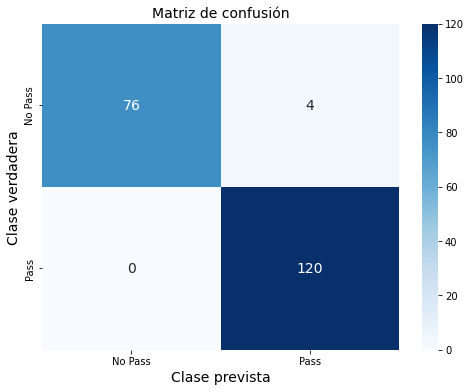

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        80
           1       0.97      1.00      0.98       120

    accuracy                           0.98       200
   macro avg       0.98      0.97      0.98       200
weighted avg       0.98      0.98      0.98       200



<Figure size 432x288 with 0 Axes>

In [106]:
# Se llama la función creada anteriormente
mostrar_resultados(y_test, predict_y)

Error de generalización obtenido con el método score()

In [69]:
# Error de generalización
print('Error en generalización: {}'.format(1-grid_rf.score(X_tf_test, y_test)))

Error en generalización: 0.020000000000000018


# Deep Learning

In [53]:
# Importanción de tensorflow
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

2.11.0


In [54]:
# Importación de librerias para crear redes neuronales
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.python.keras.layers import Reshape
from tensorflow.python.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

In [72]:
len(X_tf)

800

## Modelo 0: 

Se crea una red neuronal con dos capas ocultas de cuatro neuronas cada una, activation = 'relu', optimizador = 'adam' y se entrena el modelo con 60 epocas.

In [55]:
# Creación modelo secuencial vacio
model = Sequential()
# Capas de entrada
model.add(Dense(4,input_dim=800, activation='relu'))
# Capas Ocultas
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
# Capa de salida
model.add(Dense(1, activation='sigmoid'))

In [56]:
# Compilación del modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [57]:
# Entrenamiento del modelo con 60 epocas
modelhistory= model.fit(X_tf, y_train , epochs=60)

Epoch 1/60
25/25 [==============================] - 2s 2ms/step - loss: 0.7031 - accuracy: 0.4087
Epoch 2/60
25/25 [==============================] - 0s 2ms/step - loss: 0.6864 - accuracy: 0.5888
Epoch 3/60
25/25 [==============================] - 0s 2ms/step - loss: 0.6740 - accuracy: 0.7250
Epoch 4/60
25/25 [==============================] - 0s 2ms/step - loss: 0.6592 - accuracy: 0.7650
Epoch 5/60
25/25 [==============================] - 0s 2ms/step - loss: 0.6370 - accuracy: 0.8175
Epoch 6/60
25/25 [==============================] - 0s 2ms/step - loss: 0.6070 - accuracy: 0.8525
Epoch 7/60
25/25 [==============================] - 0s 3ms/step - loss: 0.5696 - accuracy: 0.8763
Epoch 8/60
25/25 [==============================] - 0s 2ms/step - loss: 0.5248 - accuracy: 0.9025
Epoch 9/60
25/25 [==============================] - 0s 2ms/step - loss: 0.4777 - accuracy: 0.9275
Epoch 10/60
25/25 [==============================] - 0s 2ms/step - loss: 0.4318 - accuracy: 0.9337
Epoch 11/60
25/25 [

Se evalua el modelo con los datos de prueba 

In [58]:
# Evaluacion del modelo 
test_loss, test_acc = model.evaluate(X_tf_test, y_test)
print('Test accuracy:', test_acc)
print('Error de generalización', 1-test_acc)

7/7 [==============================] - 1s 6ms/step - loss: 0.0275 - accuracy: 0.9950
Test accuracy: 0.9950000047683716
Error de generalización 0.004999995231628418


In [59]:
# Resumen del modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 module_wrapper (ModuleWrapp  (None, 4)                84        
 er)                                                             
                                                                 
 module_wrapper_1 (ModuleWra  (None, 4)                20        
 pper)                                                           
                                                                 
 module_wrapper_2 (ModuleWra  (None, 4)                20        
 pper)                                                           
                                                                 
 module_wrapper_3 (ModuleWra  (None, 1)                5         
 pper)                                                           
                                                                 
Total params: 129
Trainable params: 129
Non-trainable pa

## Modelo 1: 
Se crea una red neuronal con una capa oculta con 32 neuronas, optimizador sgd y se entrena el modelo con 20 epocas.

In [60]:
# Creación modelo secuencial vacio
model1 = Sequential()
# Capa de entrada
model1.add(Dense(32,input_dim=800, activation='relu'))
# Capa Oculta
model1.add(Dense(32, activation='relu'))
# Capa de salida
model1.add(Dense(1, activation='sigmoid'))

In [61]:
# Compilacion del modelo con optimizador sgd
model1.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [62]:
# Entrenamiento del modelo con 20 epocas
model1history= model1.fit(X_tf, y_train , epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 3ms/step - loss: 0.6417 - accuracy: 0.7475
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5968 - accuracy: 0.8300
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5531 - accuracy: 0.8712
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5103 - accuracy: 0.8838
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4687 - accuracy: 0.8988
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4283 - accuracy: 0.9050
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3907 - accuracy: 0.9112
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3564 - accuracy: 0.9150
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3255 - accuracy: 0.9250
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.2983 - accuracy: 0.9300
Epoch 11/20
25/25 [

In [63]:
# Evaluación del modelo
test_loss, test_acc = model1.evaluate(X_tf_test, y_test)
print('Test accuracy:', test_acc)
print('Error de generalización', 1-test_acc)

7/7 [==============================] - 0s 3ms/step - loss: 0.1353 - accuracy: 0.9750
Test accuracy: 0.9750000238418579
Error de generalización 0.02499997615814209


In [82]:
# Resumen del modelo
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 module_wrapper_4 (ModuleWra  (None, 32)               672       
 pper)                                                           
                                                                 
 module_wrapper_5 (ModuleWra  (None, 32)               1056      
 pper)                                                           
                                                                 
 module_wrapper_6 (ModuleWra  (None, 1)                33        
 pper)                                                           
                                                                 
Total params: 1,761
Trainable params: 1,761
Non-trainable params: 0
_________________________________________________________________


## Modelo 2: 

Se crea el mismo modelo anterior con la diferencia que se entrena con 50 epocas.

In [64]:
# Creación modelo secuencial vacio
model2 = Sequential()
# Capa de entrada
model2.add(Dense(32,input_dim=800, activation='relu'))
# Capa oculta
model2.add(Dense(32, activation='relu'))
# Capa de salida
model2.add(Dense(1, activation='sigmoid'))

In [65]:
# Compilación del modelo con optimizador sgd
model2.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [66]:
# Entrenamiento del modelo con 50 epocas.
model2history= model2.fit(X_tf, y_train , epochs=50)

Epoch 1/50
25/25 [==============================] - 1s 3ms/step - loss: 0.6369 - accuracy: 0.6988
Epoch 2/50
25/25 [==============================] - 0s 2ms/step - loss: 0.5864 - accuracy: 0.8288
Epoch 3/50
25/25 [==============================] - 0s 2ms/step - loss: 0.5395 - accuracy: 0.8763
Epoch 4/50
25/25 [==============================] - 0s 2ms/step - loss: 0.4953 - accuracy: 0.9150
Epoch 5/50
25/25 [==============================] - 0s 2ms/step - loss: 0.4528 - accuracy: 0.9275
Epoch 6/50
25/25 [==============================] - 0s 2ms/step - loss: 0.4127 - accuracy: 0.9262
Epoch 7/50
25/25 [==============================] - 0s 2ms/step - loss: 0.3755 - accuracy: 0.9362
Epoch 8/50
25/25 [==============================] - 0s 2ms/step - loss: 0.3417 - accuracy: 0.9450
Epoch 9/50
25/25 [==============================] - 0s 3ms/step - loss: 0.3115 - accuracy: 0.9463
Epoch 10/50
25/25 [==============================] - 0s 2ms/step - loss: 0.2846 - accuracy: 0.9550
Epoch 11/50
25/25 [

In [67]:
# Evaluación del modelo
test_loss, test_acc = model2.evaluate(X_tf_test, y_test)
print('Test accuracy:', test_acc)
print('Error de generalización', 1-test_acc)

7/7 [==============================] - 0s 6ms/step - loss: 0.0574 - accuracy: 0.9850
Test accuracy: 0.9850000143051147
Error de generalización 0.014999985694885254


In [68]:
# Resumen del modelo
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 module_wrapper_7 (ModuleWra  (None, 32)               672       
 pper)                                                           
                                                                 
 module_wrapper_8 (ModuleWra  (None, 32)               1056      
 pper)                                                           
                                                                 
 module_wrapper_9 (ModuleWra  (None, 1)                33        
 pper)                                                           
                                                                 
Total params: 1,761
Trainable params: 1,761
Non-trainable params: 0
_________________________________________________________________


## Modelo 3:

Se crea una red neuronal de una capa oculta de 4 neuronas con optimizador adam y se entrena el modelo con 60 epocas.

In [69]:
# Creación modelo secuencial vacio
model3 = Sequential()
# Capa de entrada
model3.add(Dense(4,input_dim=800, activation='relu'))
# Capa oculta
model3.add(Dense(4, activation='relu'))
# Capa de salida
model3.add(Dense(1, activation='sigmoid'))

In [70]:
# Compilación del modelo con optimizador adam
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [71]:
# Entrenamiento del modelo con 60 epocas
model3history= model3.fit(X_tf, y_train , epochs=60)

Epoch 1/60
25/25 [==============================] - 1s 2ms/step - loss: 0.6818 - accuracy: 0.5663
Epoch 2/60
25/25 [==============================] - 0s 2ms/step - loss: 0.6578 - accuracy: 0.6825
Epoch 3/60
25/25 [==============================] - 0s 2ms/step - loss: 0.6256 - accuracy: 0.7450
Epoch 4/60
25/25 [==============================] - 0s 2ms/step - loss: 0.5787 - accuracy: 0.7950
Epoch 5/60
25/25 [==============================] - 0s 3ms/step - loss: 0.5219 - accuracy: 0.8400
Epoch 6/60
25/25 [==============================] - 0s 2ms/step - loss: 0.4628 - accuracy: 0.8587
Epoch 7/60
25/25 [==============================] - 0s 2ms/step - loss: 0.4064 - accuracy: 0.8813
Epoch 8/60
25/25 [==============================] - 0s 2ms/step - loss: 0.3562 - accuracy: 0.8963
Epoch 9/60
25/25 [==============================] - 0s 2ms/step - loss: 0.3138 - accuracy: 0.9050
Epoch 10/60
25/25 [==============================] - 0s 2ms/step - loss: 0.2767 - accuracy: 0.9150
Epoch 11/60
25/25 [

In [72]:
# Evaluación del modelo
test_loss, test_acc = model3.evaluate(X_tf_test, y_test)
print('Test accuracy:', test_acc)
print('Error de generalización', 1-test_acc)

7/7 [==============================] - 0s 3ms/step - loss: 0.0347 - accuracy: 0.9900
Test accuracy: 0.9900000095367432
Error de generalización 0.009999990463256836


In [73]:
# Resumen del modelo
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 module_wrapper_10 (ModuleWr  (None, 4)                84        
 apper)                                                          
                                                                 
 module_wrapper_11 (ModuleWr  (None, 4)                20        
 apper)                                                          
                                                                 
 module_wrapper_12 (ModuleWr  (None, 1)                5         
 apper)                                                          
                                                                 
Total params: 109
Trainable params: 109
Non-trainable params: 0
_________________________________________________________________


## Mejor modelo deep learning

A continuación se grafica la red neuronal seleccionada como mejor modelo

In [74]:
import errno
import pydot
from tensorflow.keras.utils import plot_model

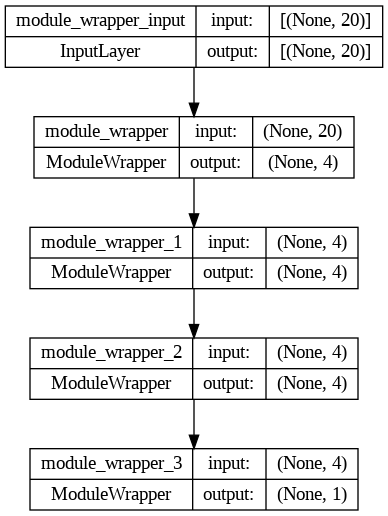

In [75]:
plot_model(model, to_file='best_model.png',show_shapes=True)

# Conclusión

El modelo machine learning  y deep learning predice correctamente si un estudiante va a pasar o no un exámen basado en el género, el tipo de comida que se le da al estudiante, el nivel de preparación para el exámen, el nivel de educación de los padres y el promedio que se obtiene a partir de las notas de matemáticas, lectura y escritura. 

Comprando ambos modelos se concluye que la red nueronal es el mejor modelo para este caso ya que el error de generalizacion es del 0.5% aproximadamente.